# Telco Customer Churn Analysis

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service.

* CustomerID: A unique ID that identifies each customer.
* Gender: The customer’s gender: Male, Female
* Senior Citizen: Indicates if the customer is 65 or older: Yes, No
* Partner: Indicates if the customer has a partner: Yes, No
* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
* Tenure: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
* Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
* Tech Support: Indicates if the customer subscribes to an additional tech support service provided by the company: Yes, No
* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. 
* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. 
* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
* Churn: Yes = the customer left the company this quarter. No = the customer remained with the company.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
warnings.filterwarnings("ignore")

telco_customer_churn = pd.read_csv("telco_customer_churn.csv")
df = telco_customer_churn.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Missing Values

In [4]:
def count_missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    dtype = data.dtypes
    missing_data = pd.concat([total, percent, dtype], axis=1, keys=['Total', 'Percent', 'Data Type'])
    return missing_data

In [5]:
count_missing_data(df)

,Total,Percent,Data Type
Churn,0,0.0,object
OnlineSecurity,0,0.0,object
gender,0,0.0,object
SeniorCitizen,0,0.0,int64
Partner,0,0.0,object
Dependents,0,0.0,object
tenure,0,0.0,int64
PhoneService,0,0.0,object
MultipleLines,0,0.0,object
InternetService,0,0.0,object


There's no missing data in our dataset.

In [6]:
df = df.drop('customerID', axis=1)

There are empty values in TotalCharges. 

In [7]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Since the tenure is 0 for each of the records, there is no TotalCharges on these accounts. So we can fill the empty rows with 0.

In [8]:
df['TotalCharges']= df['TotalCharges'].replace(' ',np.NaN)
df['TotalCharges']= df['TotalCharges'].astype(np.float)
df['TotalCharges']= df['TotalCharges'].fillna(0)

In [9]:
numeric_features = df.dtypes[df.dtypes != "object"].index
categorical_features = df.dtypes[df.dtypes == "object"].drop('Churn').index

<h2>Categorical Attributes</h2>

In [10]:
df.describe(include=['object']).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


<h3>Target Value Churn</h3>

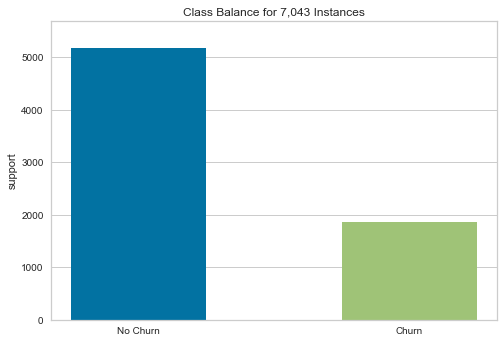

In [11]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["No Churn", "Churn"])

visualizer.fit(df['Churn'])       
visualizer.show();

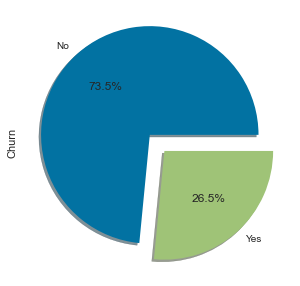

In [12]:
df['Churn'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(8,5));

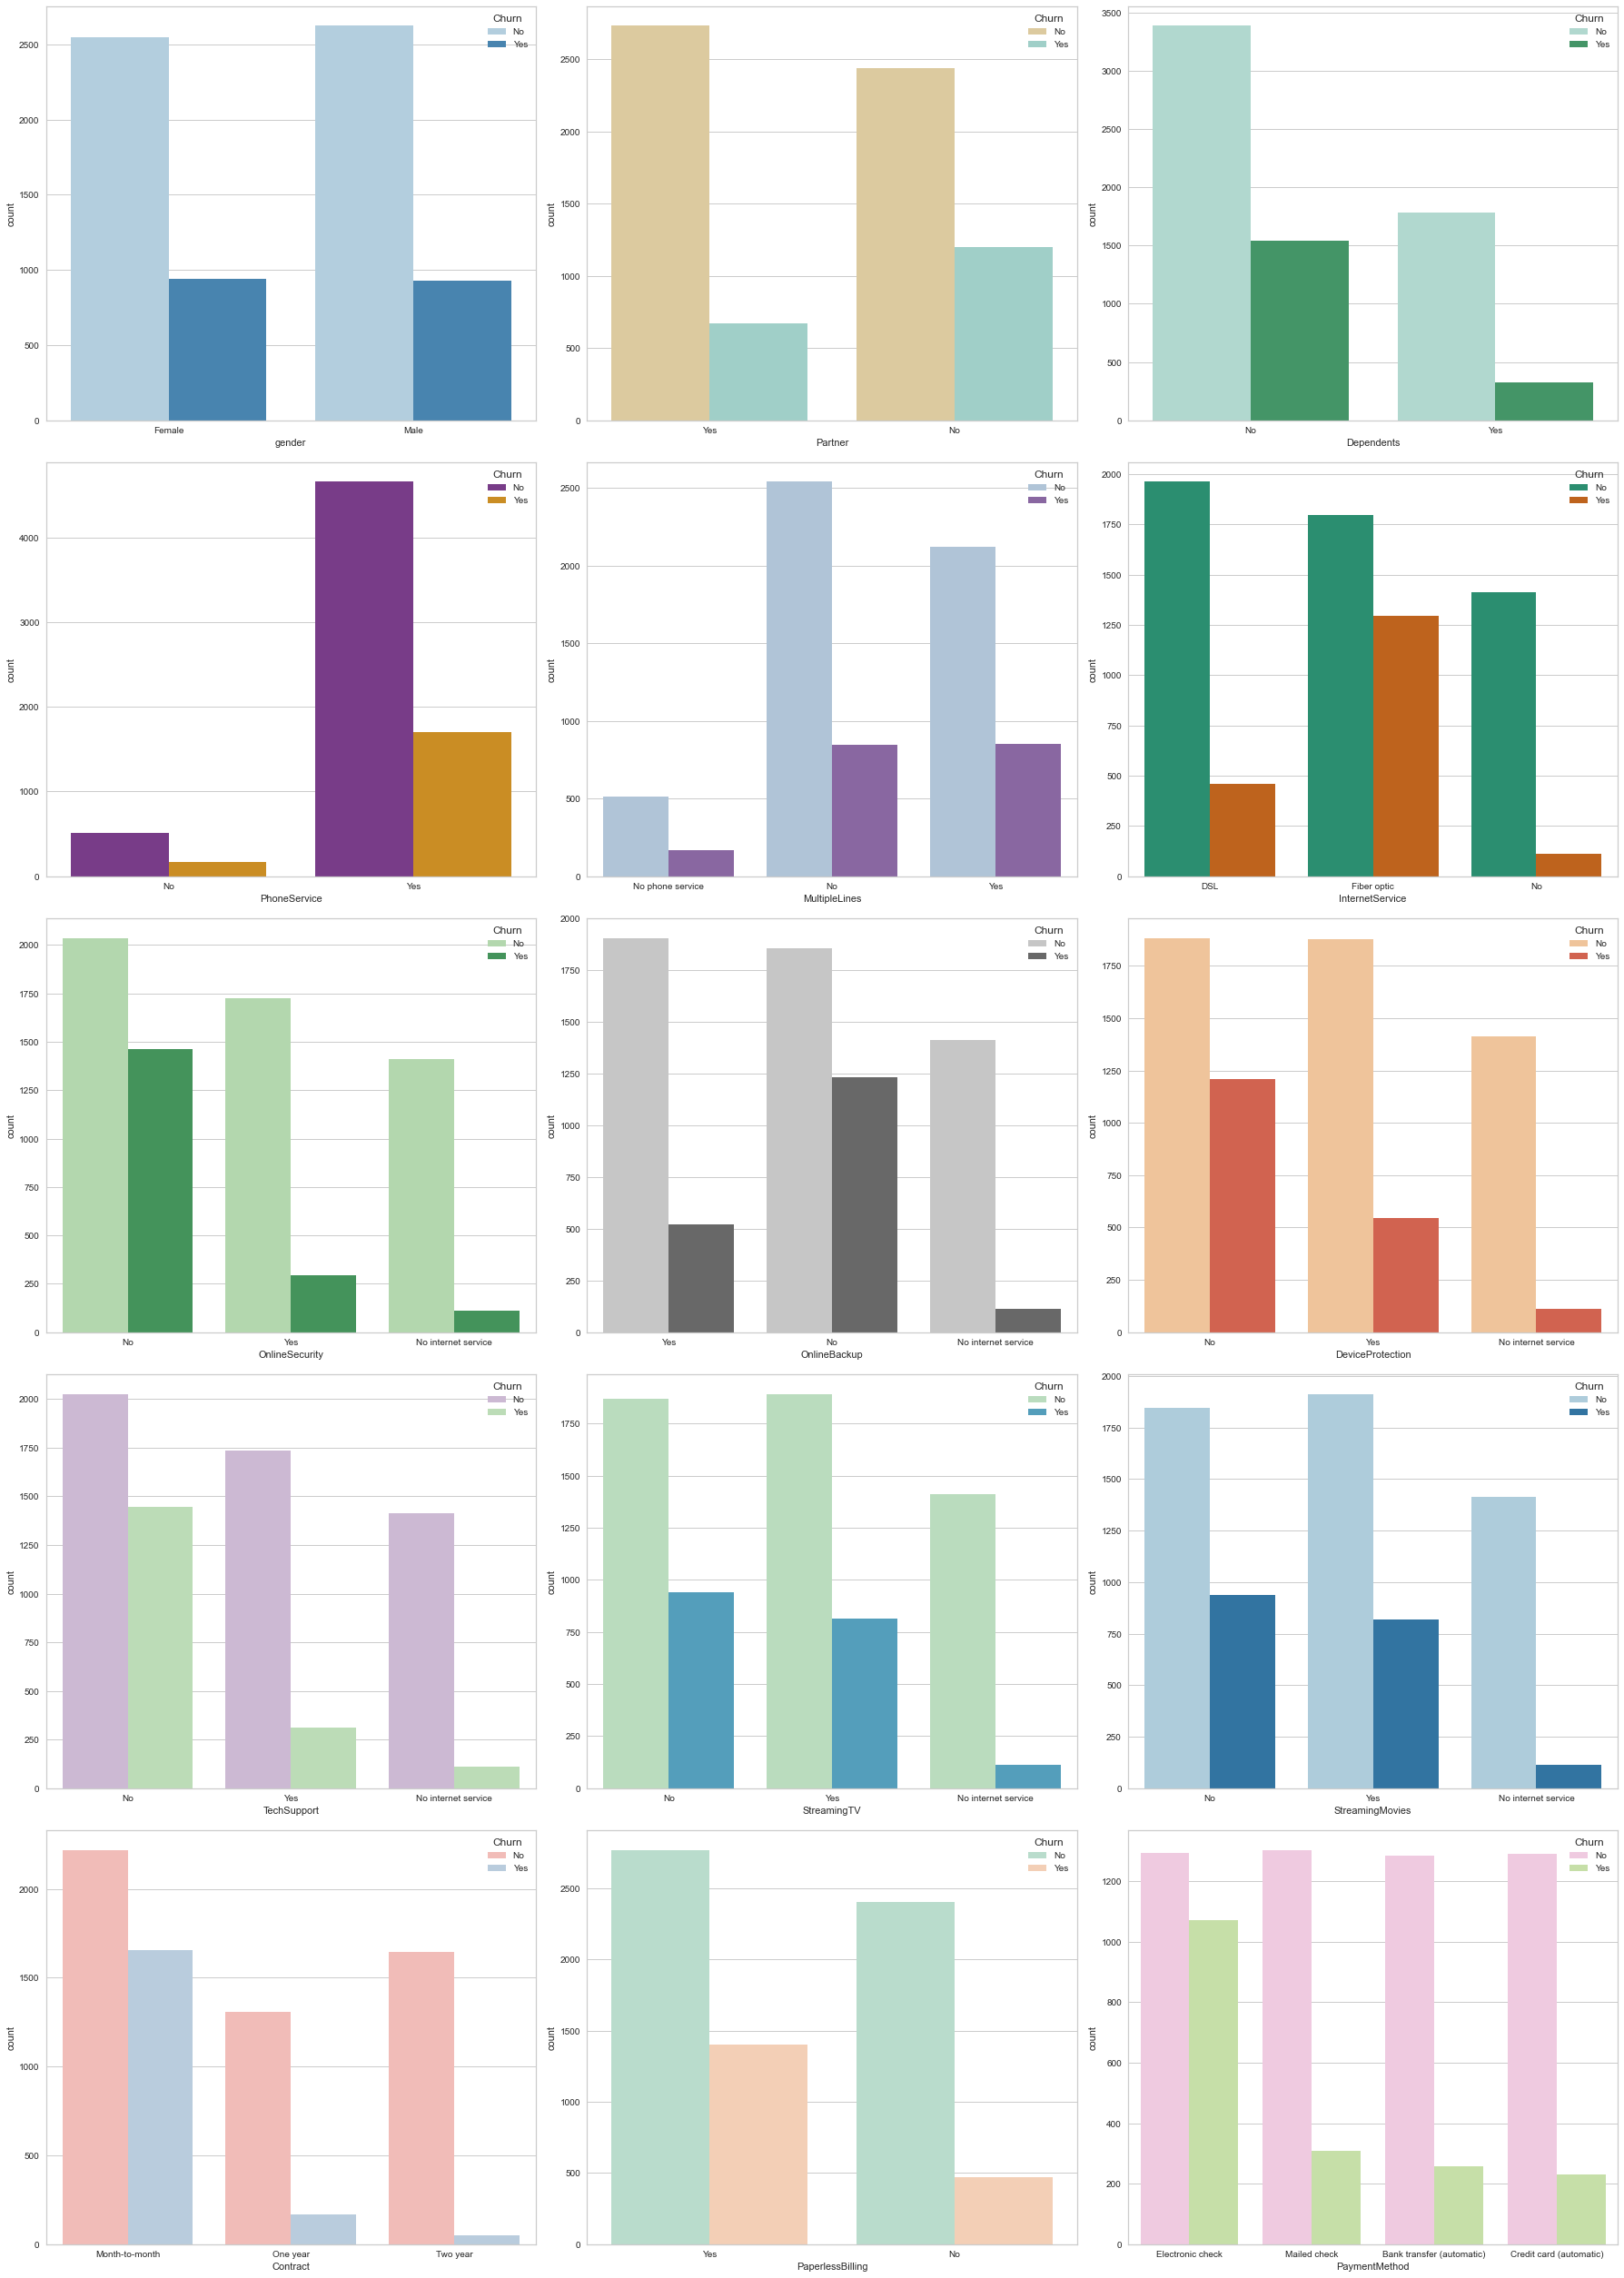

In [13]:
plt.figure(figsize=(25, 35))
pal = ['Accent', 'Blues', 'BrBG', 'BuGn', 'CMRmap','BuPu', 'Dark2', 'Greens', 'Greys', 'OrRd', 'PRGn', 'GnBu', 'Paired', 'Pastel1', 'Pastel2', 'PiYG', 'PuBu', 'PuBuGn']
for i, col in enumerate(categorical_features, 1):
    plt.subplot(5, 3, i)
    sns.countplot(col, hue='Churn', data=df, palette=pal[i])
    plt.tight_layout()   

* People who subscribed to home phone service are not likely to churn.
* People with fibre optic Internet Service are more likely to churn than people with DSL.
* People with no online security service are more likely to churn.
* People with no online backup service are more likely to churn than people with online backup service.
* People with no device protection are more likey to churn.
* People with no tech support are more likely to churn.
* People with month-to-month contract are more likely churn than other contract methods.
* People with paperless billing are more likely churn than no paperless billing.
* People who use electronic check as a payment method are more likely to churn than other payment methods.

<h2>Numerical Attributes</h2>

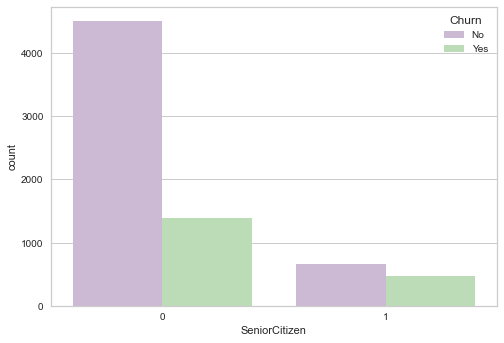

In [14]:
sns.countplot("SeniorCitizen", hue='Churn', data=df, palette=pal[10]);

People who are younger than 65 are less likely churn than people who are older than 65.

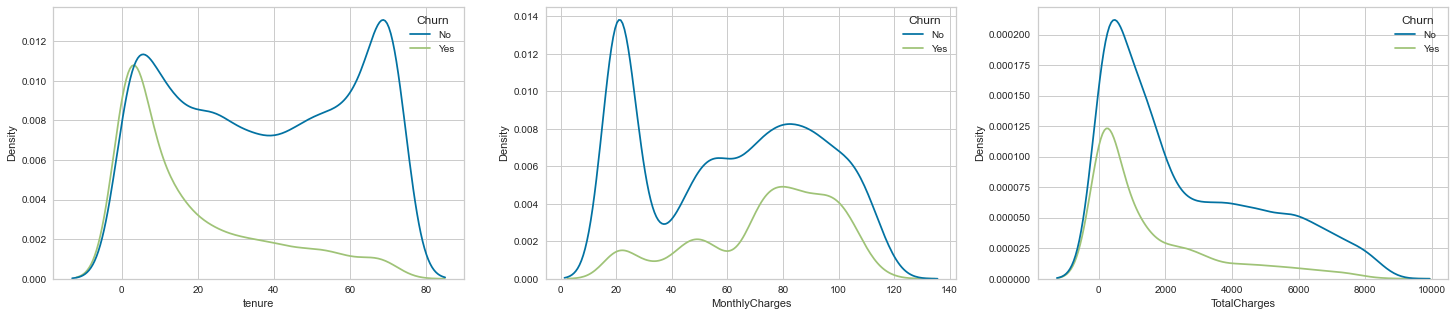

In [15]:
num_feat = numeric_features.drop('SeniorCitizen')
f = plt.figure(figsize=(25,5))
for i in range(3):
    f.add_subplot(1, 3, i+1)
    sns.kdeplot(data=df, x=num_feat[i], hue="Churn")
plt.show()

### Tenure - Churn

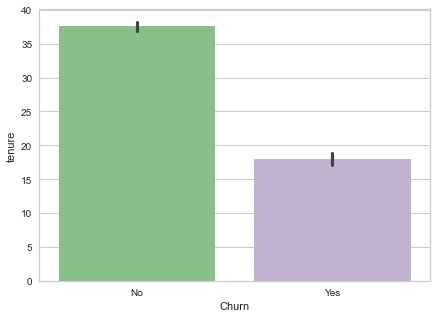

In [16]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Churn', y="tenure", palette=pal[0]);

The customers who have been with the company for many months are less likely to churn.

### MonthlyCharges - Churn

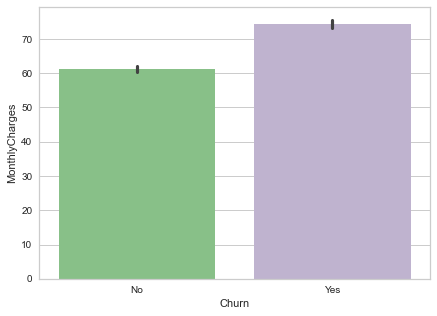

In [17]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Churn', y="MonthlyCharges", palette=pal[0]);

### TotalCharges - Churn

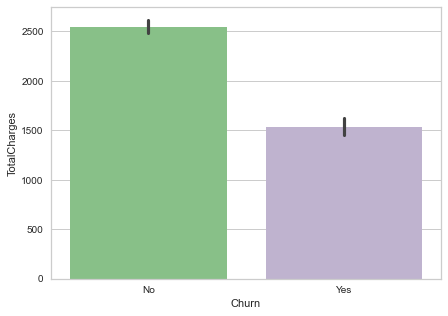

In [18]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Churn', y="TotalCharges", palette=pal[0]);

The customers whose total charges are high are less likely to churn.

## Correlation between features

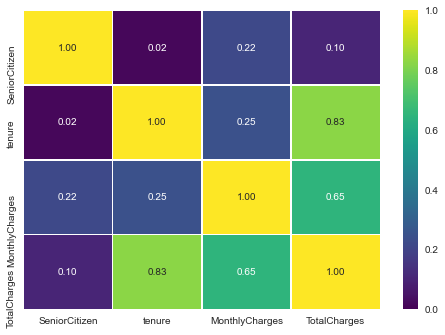

In [19]:
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5, vmin=0, vmax=1, cmap='viridis');

The highest correlation is between tenure and TotalCharges with 0.83%.

## Outliers

In [20]:
def draw_boxplot(df, features):
    f = pd.melt(df, value_vars=features)
    g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size = 5)
    g = g.map(sns.boxplot, "value", orient="v", palette="Blues")
    plt.show()

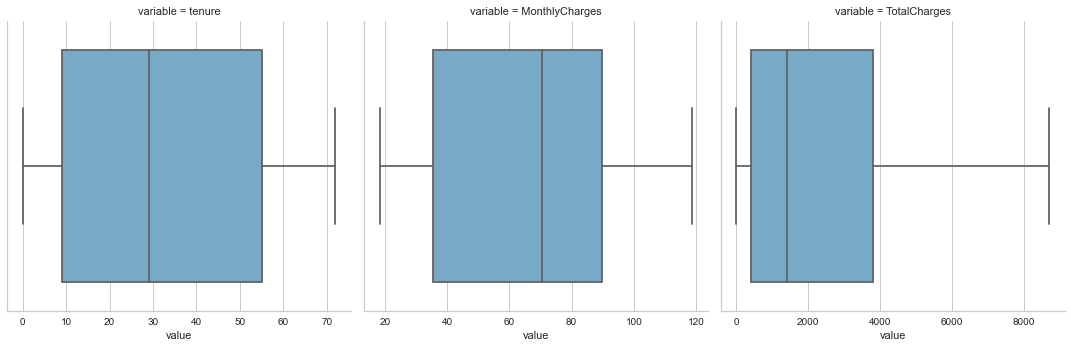

In [21]:
draw_boxplot(df, num_feat)

There's no outliers in our dataset.

## Feature Engineering

### Converting Categorical Columns to Numerical

In [22]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

def get_categorical_columns(df):
    return df.dtypes[df.dtypes == "object"].index

In [23]:
get_uniques(df, get_categorical_columns(df))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [24]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']

df[cols] = df[cols].replace('No internet service', 'No')

In [25]:
get_uniques(df, get_categorical_columns(df))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [26]:
df2 = df.copy()

In [27]:
df = pd.get_dummies(df, columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,Yes,No,1,No,No,No,Yes,No,No,...,29.85,No,0,0,0,0,0,0,1,0
1,0,No,No,34,Yes,No,Yes,No,Yes,No,...,1889.50,No,1,0,0,1,0,0,0,1
2,0,No,No,2,Yes,No,Yes,Yes,No,No,...,108.15,Yes,1,0,0,0,0,0,0,1
3,0,No,No,45,No,No,Yes,No,Yes,Yes,...,1840.75,No,1,0,0,1,0,0,0,0
4,0,No,No,2,Yes,No,No,No,No,No,...,151.65,Yes,0,1,0,0,0,0,1,0


In [28]:
get_uniques(df, get_categorical_columns(df))

{'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'PaperlessBilling': ['Yes', 'No'],
 'Churn': ['No', 'Yes']}

In [29]:
def binary_encoding(df, feature, val):
    df = df.copy()
    df[feature] = df[feature].apply(lambda x: 1 if x == val else 0)
    return df

In [30]:
binary_features = get_categorical_columns(df)

for feature in binary_features:
    df = binary_encoding(df, feature, 'Yes')

In [31]:
df3 = df.copy()

In [32]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,1,0,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,1,0,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,1,0,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,0,1,0,0,0,0,1,0


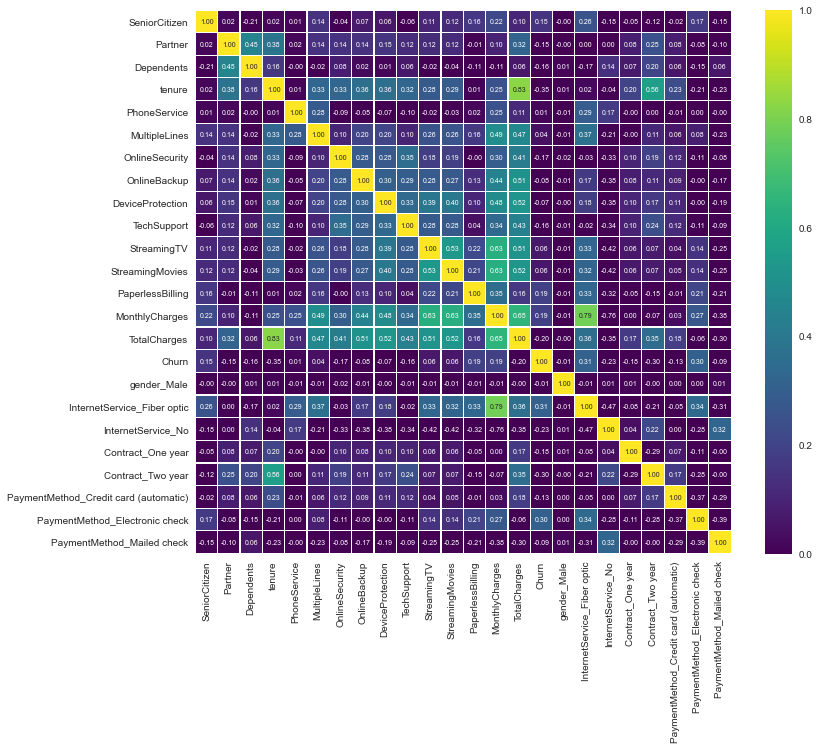

In [33]:
corrmat = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrmat, annot=True, fmt='.2f', annot_kws={"size": 7}, linewidths=.2, vmin=0, vmax=1, cmap='viridis');

In [34]:
corr_list = corrmat['Churn'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines                            0.040102
PhoneService                             0.011942
gender_Male                             -0.008612
DeviceProtection                        -0.066160
OnlineBackup                            -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport                             -0.164674
OnlineSecurity                          -0.171226
Contract_One year                       -0.177820
TotalCharges                            -0.198324


In [35]:
# Define X and y

X = df.drop('Churn', axis=1)
y = df['Churn']

In [36]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111, stratify=y)
classes = ['no churn', 'churn']

In [37]:
from yellowbrick.classifier import ClassificationReport

def class_report(model):
    visualizer = ClassificationReport(model, classes=classes, cmap='GnBu')
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    g = visualizer.poof()

In [38]:
from yellowbrick.classifier import ClassPredictionError

def class_pred_error(model):
    visualizer = ClassPredictionError(model, classes=classes)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show();

In [39]:
from yellowbrick.classifier import ConfusionMatrix

def plot_confusion_matrix(model):
    cm = ConfusionMatrix(model, classes=classes, cmap='RdPu')
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

In [40]:
from yellowbrick.classifier import ROCAUC

def plot_roc_auc(model):
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show();

In [41]:
from yellowbrick.classifier import PrecisionRecallCurve

def plot_pr_curve(model):
    pr_curve = PrecisionRecallCurve(model,
             classes=classes,
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))
    pr_curve.fit(X_train, y_train)
    pr_curve.score(X_test, y_test)
    pr_curve.show();

In [42]:
from sklearn.model_selection import cross_validate

def cross_valid(model, k):
    cv = cross_validate(estimator=model, X=X, y=y, cv=k,
                    return_train_score=True,
                    scoring = ['accuracy', 'precision', 'recall'])
    
    print('Train Set Mean Accuracy  : {:.3f}'.format(cv['train_accuracy'].mean()))
    print('Train Set Mean Precision : {:.3f}'.format(cv['train_precision'].mean()))
    print('Train Set Mean Recall    : {:.3f}\n '.format(cv['train_recall'].mean()))
    print('Test Set Mean Accuracy   : {:.3f}'.format(cv['test_accuracy'].mean()))
    print('Test Set Mean Precision  : {:.3f}'.format(cv['test_precision'].mean()))
    print('Test Set Mean Recall     : {:.3f}'.format(cv['test_recall'].mean()))

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

accuracy_train_logreg = log_reg.score(X_train, y_train)
accuracy_test_logreg = log_reg.score(X_test, y_test)
test_prediction_proba = log_reg.predict_proba(X_test)[:,1]
log_reg_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = log_reg.predict(X_test)
log_reg_precision = precision_score(y_test,y_pred)
log_reg_recall = recall_score(y_test,y_pred)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_logreg)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_logreg))

Accuracy on Train Data : 0.805
Accuracy on Test Data  : 0.804


### Logistic Regression Cross Validation

In [44]:
cross_valid(log_reg, 10)

Train Set Mean Accuracy  : 0.804
Train Set Mean Precision : 0.663
Train Set Mean Recall    : 0.534
 
Test Set Mean Accuracy   : 0.805
Test Set Mean Precision  : 0.665
Test Set Mean Recall     : 0.534


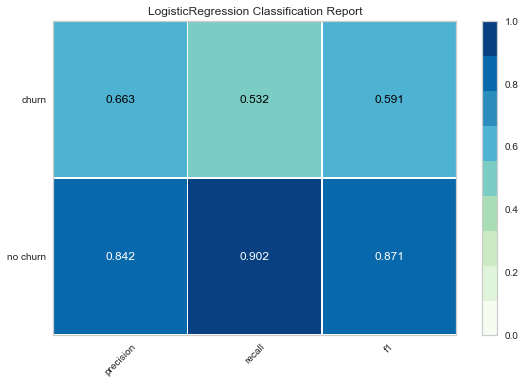

In [45]:
class_report(log_reg)

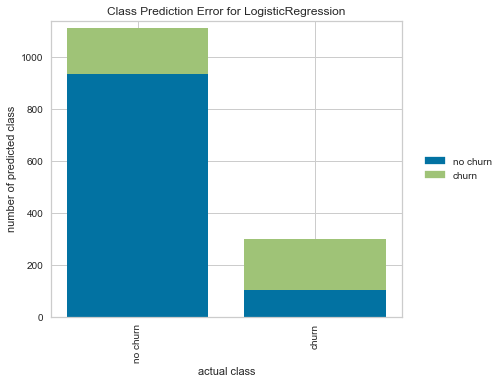

In [46]:
class_pred_error(log_reg)

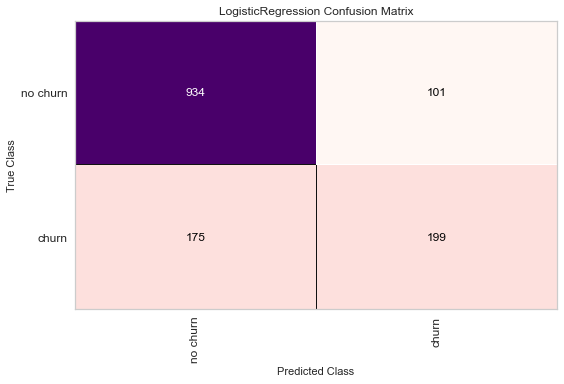

In [47]:
plot_confusion_matrix(log_reg)

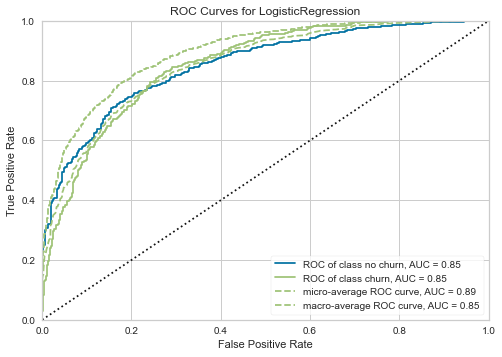

In [48]:
plot_roc_auc(log_reg)

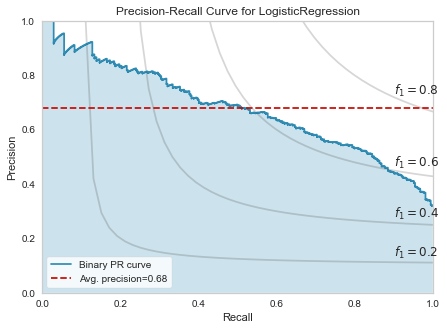

In [49]:
plot_pr_curve(log_reg)

We have 80.5% accuracy on train data and 80.4% accuracy on test data. With AUC value 0.85 and average precision 0.68.

## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

accuracy_train_knn = knn.score(X_train, y_train)
accuracy_test_knn = knn.score(X_test, y_test)
test_prediction_proba = knn.predict_proba(X_test)[:,1]
knn_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = knn.predict(X_test)
knn_precision = precision_score(y_test,y_pred)
knn_recall = recall_score(y_test,y_pred)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_knn)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_knn))

Accuracy on Train Data : 0.829
Accuracy on Test Data  : 0.765


In [51]:
cross_valid(knn, 5)

Train Set Mean Accuracy  : 0.831
Train Set Mean Precision : 0.733
Train Set Mean Recall    : 0.570
 
Test Set Mean Accuracy   : 0.762
Test Set Mean Precision  : 0.566
Test Set Mean Recall     : 0.446


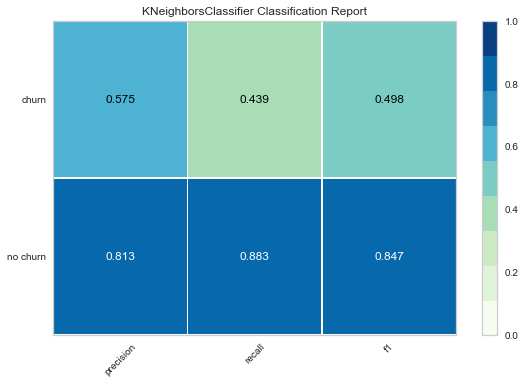

In [52]:
class_report(knn)

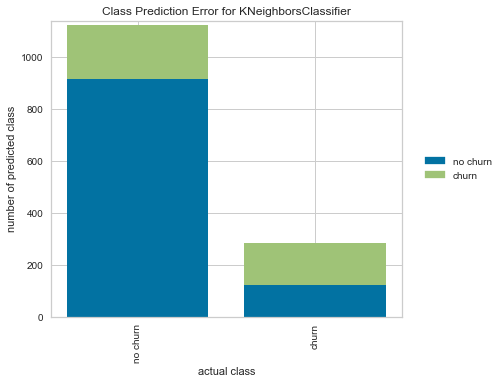

In [53]:
class_pred_error(knn)

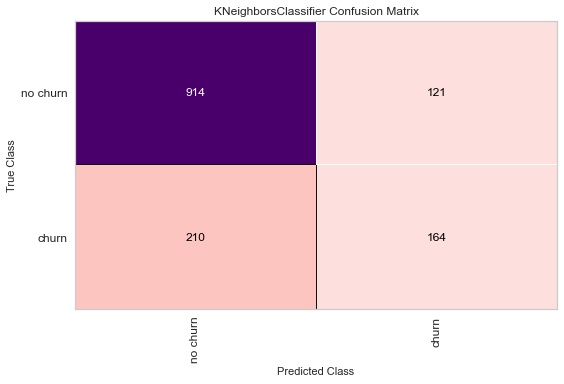

In [54]:
plot_confusion_matrix(knn)

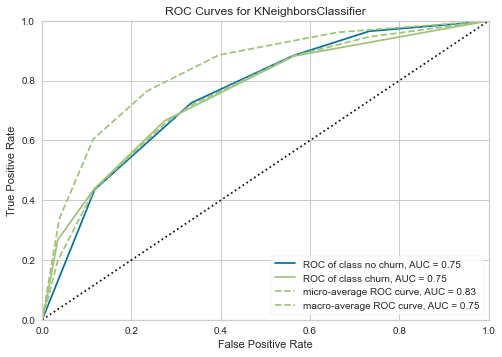

In [55]:
plot_roc_auc(knn)

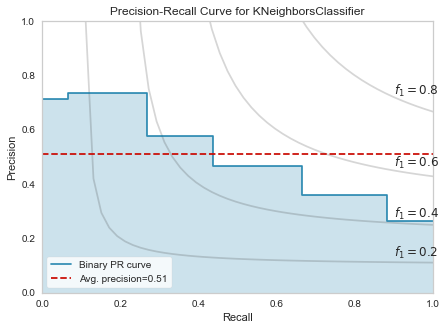

In [56]:
plot_pr_curve(knn)

Our knn model achieved 83% success in train data and 76% success in test data. With AUC value 0.75 and average precision 0.51.

## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 111)
decision_tree.fit(X_train, y_train)

accuracy_train_decisiontree = decision_tree.score(X_train, y_train)
accuracy_test_decisiontree = decision_tree.score(X_test, y_test)
test_prediction_proba = decision_tree.predict_proba(X_test)[:,1]
decision_tree_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = decision_tree.predict(X_test)
decision_tree_precision = precision_score(y_test,y_pred)
decision_tree_recall = recall_score(y_test,y_pred)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_decisiontree)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_decisiontree))

Accuracy on Train Data : 0.998
Accuracy on Test Data  : 0.722


In [58]:
cross_valid(decision_tree, 10)

Train Set Mean Accuracy  : 0.998
Train Set Mean Precision : 0.999
Train Set Mean Recall    : 0.992
 
Test Set Mean Accuracy   : 0.731
Test Set Mean Precision  : 0.494
Test Set Mean Recall     : 0.512


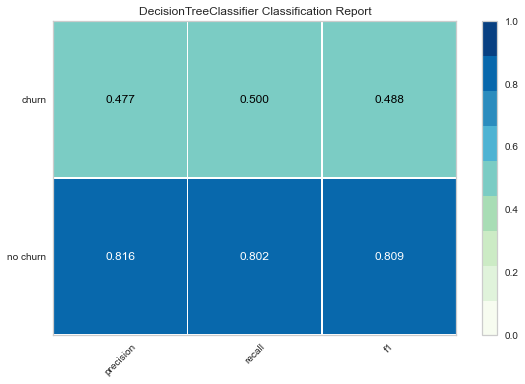

In [59]:
class_report(decision_tree)

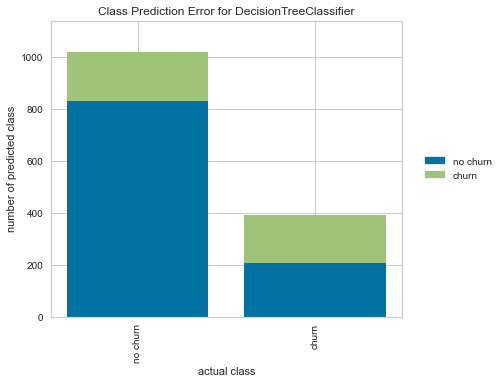

In [60]:
class_pred_error(decision_tree)

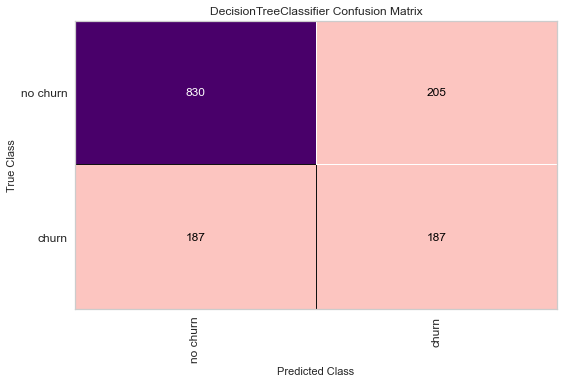

In [61]:
plot_confusion_matrix(decision_tree)

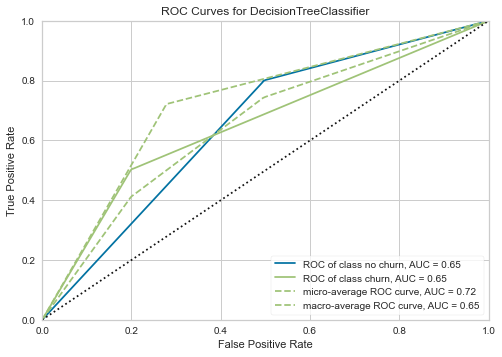

In [62]:
plot_roc_auc(decision_tree)

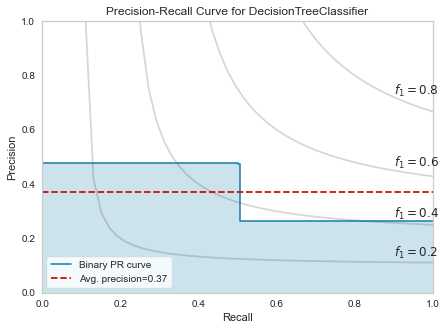

In [63]:
plot_pr_curve(decision_tree)

Our decision tree model achieved 99.8% success in train data and 72.2% success in test data. With AUC value 0.65 and average precision 0.37. Since the difference between train and test sets is too large, our model overfits the training set.

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50, random_state=11)
random_forest.fit(X_train, y_train)

accuracy_train_randomforest = random_forest.score(X_train, y_train)
accuracy_test_randomforest = random_forest.score(X_test, y_test)
test_prediction_proba = random_forest.predict_proba(X_test)[:,1]
random_forest_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = random_forest.predict(X_test)
random_forest_precision = precision_score(y_test,y_pred)
random_forest_recall = recall_score(y_test,y_pred)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_randomforest)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_randomforest))

Accuracy on Train Data : 0.997
Accuracy on Test Data  : 0.788


In [65]:
cross_valid(random_forest, 10)

Train Set Mean Accuracy  : 0.997
Train Set Mean Precision : 0.996
Train Set Mean Recall    : 0.993
 
Test Set Mean Accuracy   : 0.793
Test Set Mean Precision  : 0.651
Test Set Mean Recall     : 0.480


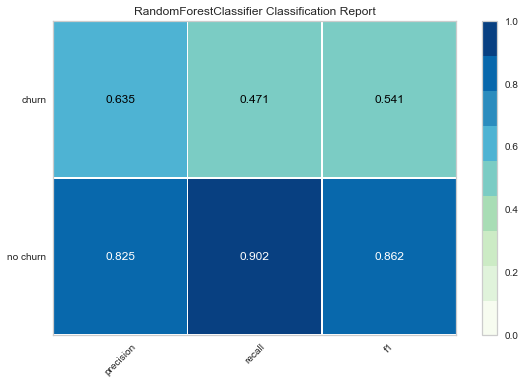

In [66]:
class_report(random_forest)

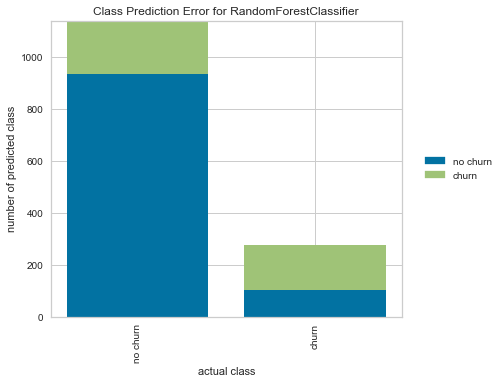

In [67]:
class_pred_error(random_forest)

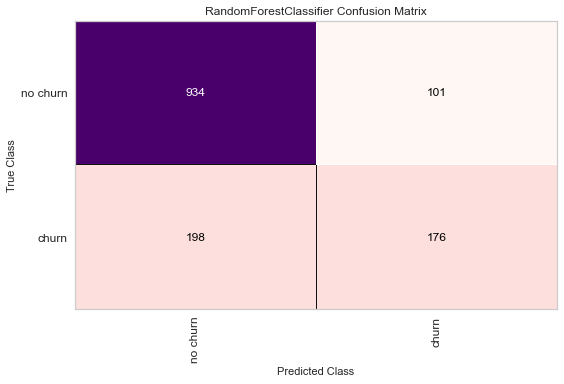

In [68]:
plot_confusion_matrix(random_forest)

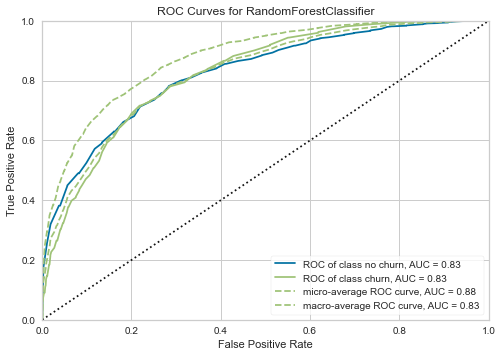

In [69]:
plot_roc_auc(random_forest)

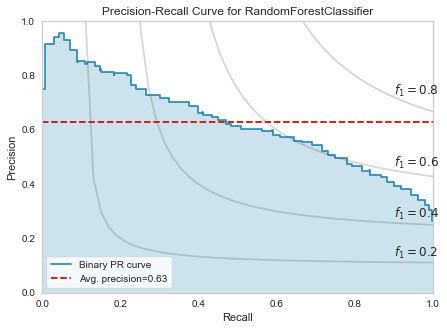

In [70]:
plot_pr_curve(random_forest)

Our random forest model achieved 99.7% success in train data and 78.8% success in test data. With AUC value 0.83 and average precision 0.63. Since the difference between train and test sets is too large, our model overfits the training set.

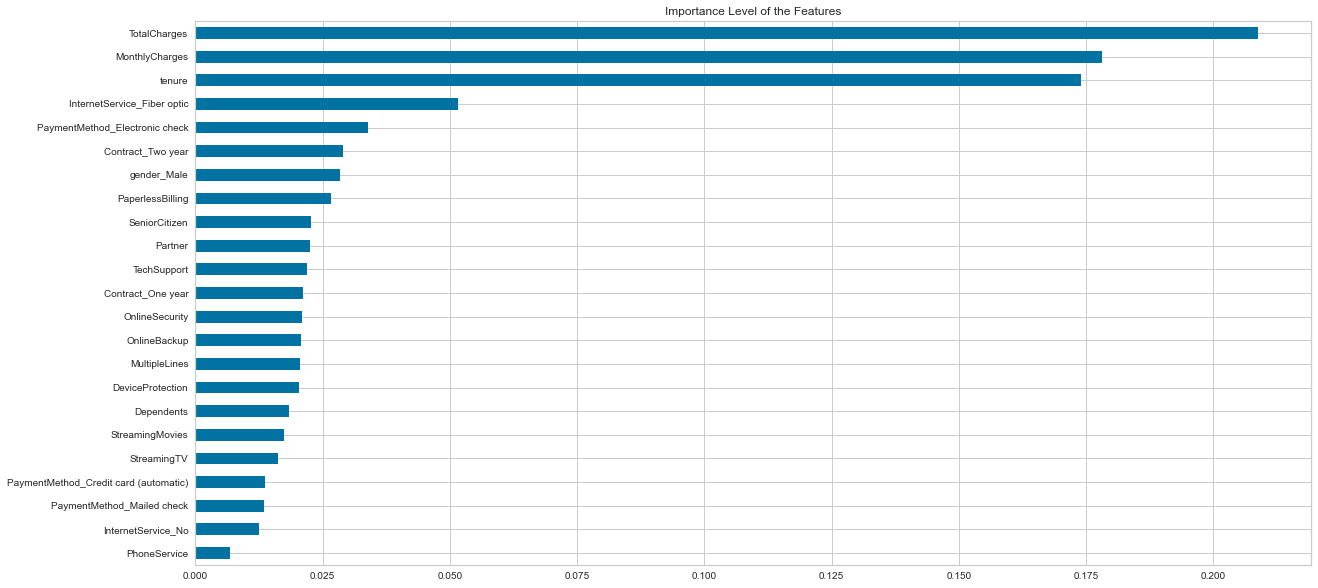

In [71]:
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh')
plt.title('Importance Level of the Features')
plt.show()

## Support Vector Machine

In [72]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)

accuracy_train_svc = svc.score(X_train, y_train)
accuracy_test_svc = svc.score(X_test, y_test)
test_prediction_proba = svc.predict_proba(X_test)[:,1]
svc_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = svc.predict(X_test)
svc_precision = precision_score(y_test,y_pred)
svc_recall = recall_score(y_test,y_pred)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_svc)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_svc))

Accuracy on Train Data : 0.735
Accuracy on Test Data  : 0.735


In [73]:
cross_valid(svc, 3)

Train Set Mean Accuracy  : 0.735
Train Set Mean Precision : 0.000
Train Set Mean Recall    : 0.000
 
Test Set Mean Accuracy   : 0.735
Test Set Mean Precision  : 0.000
Test Set Mean Recall     : 0.000


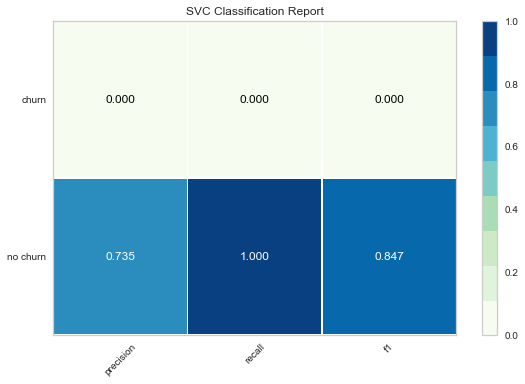

In [74]:
class_report(svc)

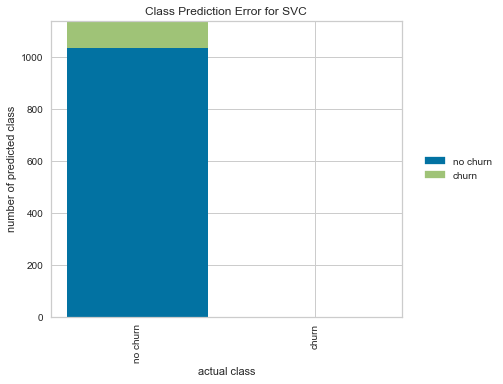

In [75]:
class_pred_error(svc)

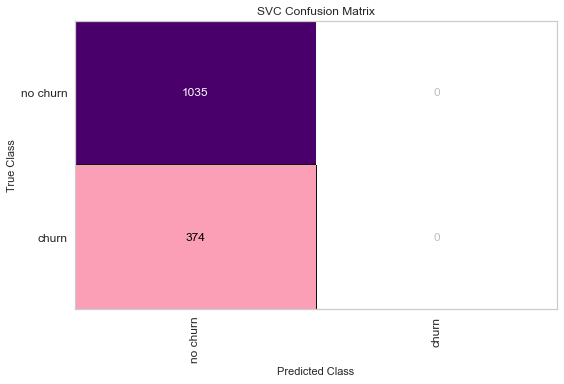

In [76]:
plot_confusion_matrix(svc)

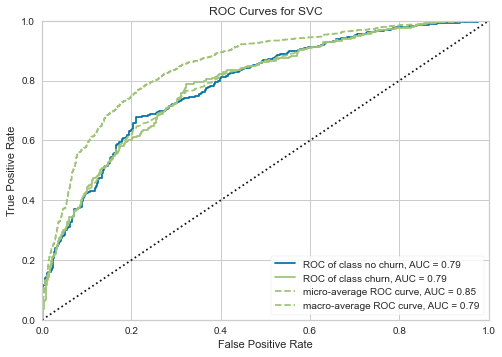

In [77]:
plot_roc_auc(svc)

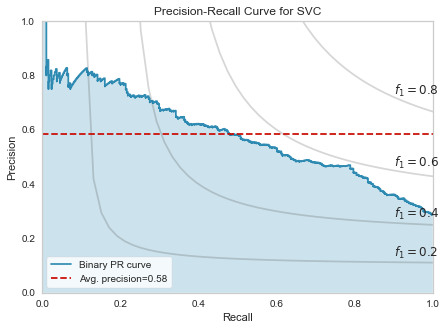

In [78]:
plot_pr_curve(svc)

Our support vector machine model achieved 73.5% success in train data and 73.5% success in test data. With AUC value 0.79 and average precision 0.58.

## XGBOOST

In [79]:
from xgboost.sklearn import XGBClassifier

xgboost = XGBClassifier(objective="reg:logistic", max_depth=5, seed=11)
xgboost.fit(X_train, y_train)

accuracy_train_xgb = xgboost.score(X_train, y_train)
accuracy_test_xgb = xgboost.score(X_test, y_test)
test_prediction_proba = xgboost.predict_proba(X_test)[:,1]
xgb_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = xgboost.predict(X_test)
xgb_precision = precision_score(y_test,y_pred)
xgb_recall = recall_score(y_test,y_pred)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_xgb)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_xgb))

Accuracy on Train Data : 0.896
Accuracy on Test Data  : 0.801


In [80]:
cross_valid(xgboost, 10)

Train Set Mean Accuracy  : 0.896
Train Set Mean Precision : 0.846
Train Set Mean Recall    : 0.745
 
Test Set Mean Accuracy   : 0.789
Test Set Mean Precision  : 0.624
Test Set Mean Recall     : 0.515


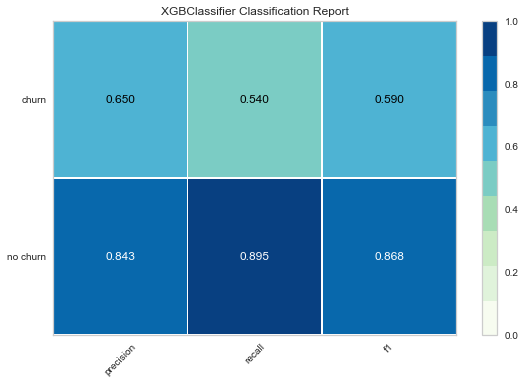

In [81]:
class_report(xgboost)

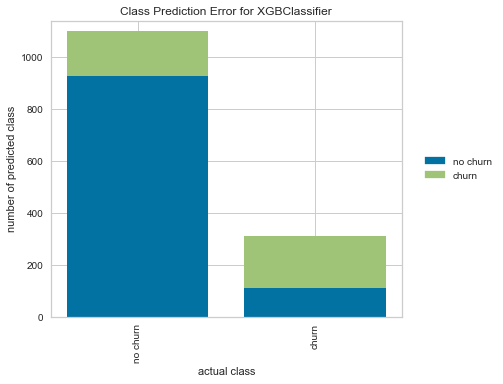

In [82]:
class_pred_error(xgboost)

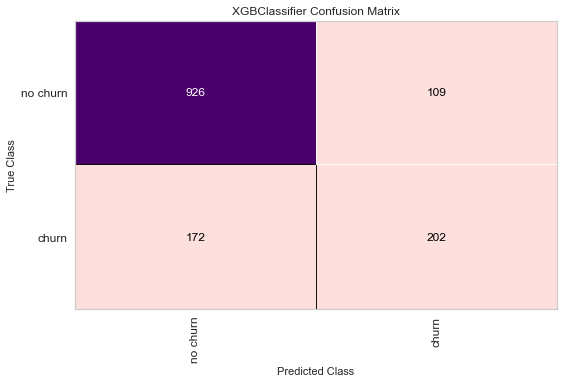

In [83]:
plot_confusion_matrix(xgboost)

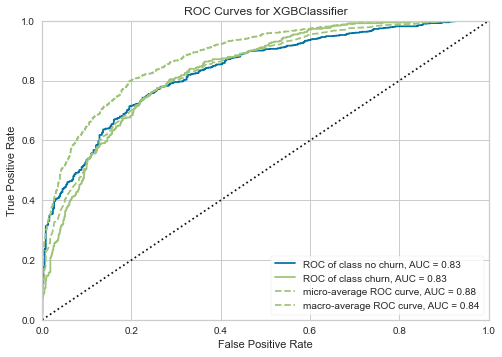

In [84]:
plot_roc_auc(xgboost)

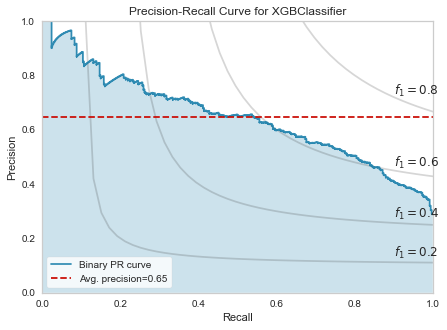

In [85]:
plot_pr_curve(xgboost)

Our xgboost model achieved 89.6% success in train data and 80.1% success in test data. With AUC value 0.83 and average precision 0.65.

## Light GBM

In [86]:
import lightgbm as lgb

light_gbm = lgb.LGBMClassifier()
light_gbm.fit(X_train, y_train)

accuracy_train_lightgbm = light_gbm.score(X_train, y_train)
accuracy_test_lightgbm = light_gbm.score(X_test, y_test)
test_prediction_proba = light_gbm.predict_proba(X_test)[:,1]
lightgbm_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = light_gbm.predict(X_test)
lightgbm_precision = precision_score(y_test,y_pred)
lightgbm_recall = recall_score(y_test,y_pred)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_lightgbm)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_lightgbm))

Accuracy on Train Data : 0.877
Accuracy on Test Data  : 0.797


In [87]:
cross_valid(light_gbm, 10)

Train Set Mean Accuracy  : 0.873
Train Set Mean Precision : 0.803
Train Set Mean Recall    : 0.691
 
Test Set Mean Accuracy   : 0.798
Test Set Mean Precision  : 0.645
Test Set Mean Recall     : 0.532


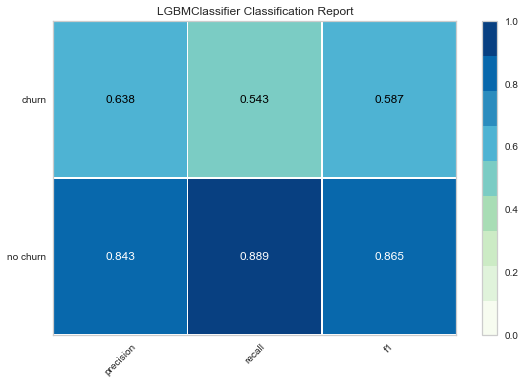

In [88]:
class_report(light_gbm)

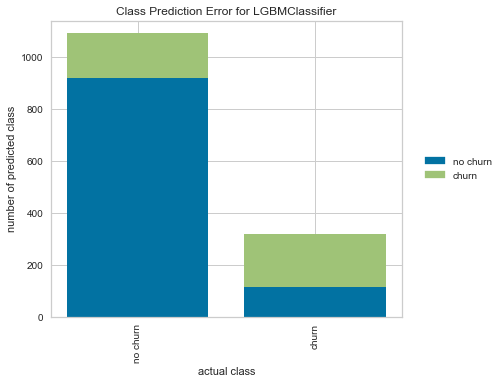

In [89]:
class_pred_error(light_gbm)

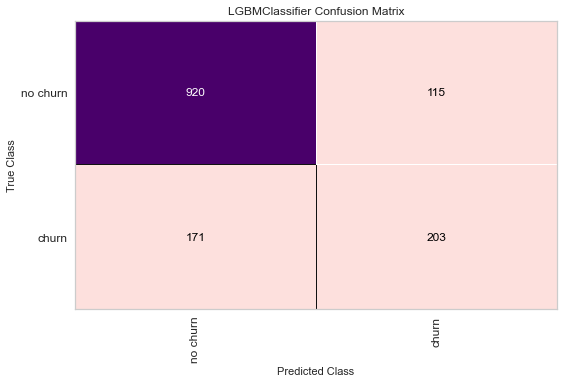

In [90]:
plot_confusion_matrix(light_gbm)

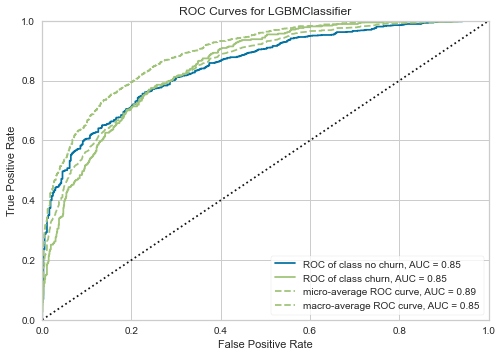

In [91]:
plot_roc_auc(light_gbm)

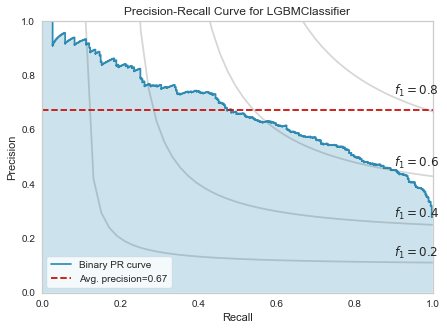

In [92]:
plot_pr_curve(light_gbm)

Our light gbm model achieved 87.7% success in train data and 79.7% success in test data. With AUC value 0.85 and average precision 0.67.

## Models Summary

In [93]:
model_names=['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'XGBoost', 'Light GBM']
model_dict = {'Models':model_names,
                 'Train Accuracy': [accuracy_train_logreg, accuracy_train_knn, accuracy_train_decisiontree, accuracy_train_randomforest, accuracy_train_svc, accuracy_train_xgb, accuracy_train_lightgbm],
                 'Test Accuracy': [accuracy_test_logreg, accuracy_test_knn, accuracy_test_decisiontree, accuracy_test_randomforest, accuracy_test_svc, accuracy_test_xgb, accuracy_test_lightgbm],
                 'AUC Score': [log_reg_auc, knn_auc, decision_tree_auc, random_forest_auc, svc_auc, xgb_auc, lightgbm_auc],
                 'Precision': [log_reg_precision, knn_precision, decision_tree_precision, random_forest_precision, svc_precision, xgb_precision, lightgbm_precision],
                 'Recall': [log_reg_recall, knn_recall, decision_tree_recall, random_forest_recall, svc_recall, xgb_recall, lightgbm_recall]}
model_summary=pd.DataFrame(model_dict)

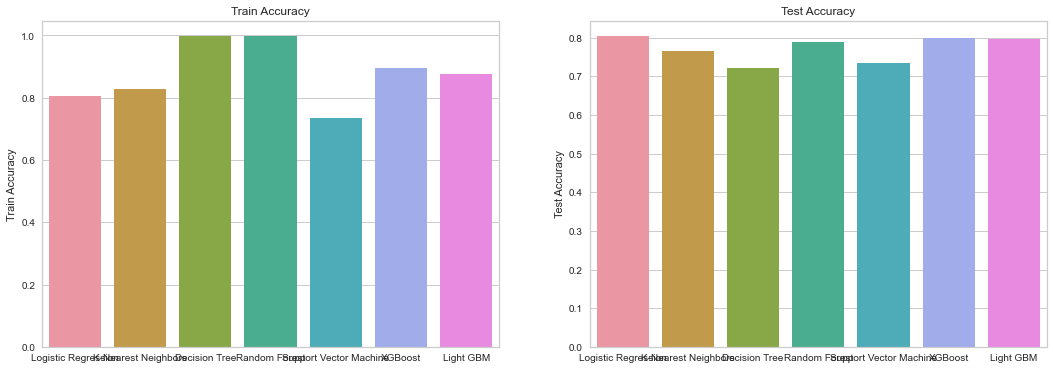

In [94]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.title("Train Accuracy")
sns.barplot(model_names,model_summary['Train Accuracy'])
plt.subplot(1, 2, 2)
plt.title("Test Accuracy")
sns.barplot(model_names,model_summary['Test Accuracy'])
plt.show()

We can see that among in our models decision tree and random forest achieved the highest success on train data. For test data, we can see that logistic regression model achieved the highest success but other models' accuracy scores are close too.

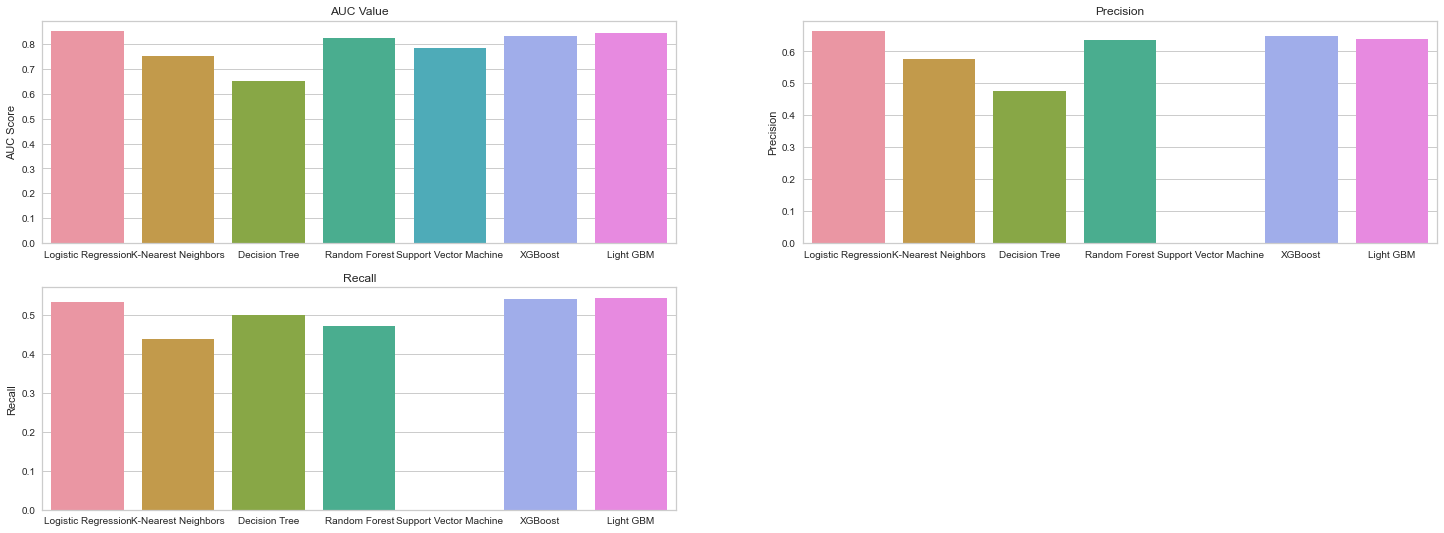

In [95]:
plt.figure(figsize=(25, 9))

plt.subplot(2, 2, 1)
plt.title("AUC Value")
sns.barplot(model_names,model_summary['AUC Score'])
plt.subplot(2, 2, 2)
plt.title("Precision")
sns.barplot(model_names,model_summary['Precision'])
plt.subplot(2, 2, 3)
plt.title("Recall")
sns.barplot(model_names,model_summary['Recall'])

plt.show()

In [96]:
model_summary

,Models,Train Accuracy,Test Accuracy,AUC Score,Precision,Recall
0,Logistic Regression,0.805289,0.804116,0.853086,0.663333,0.532086
1,K-Nearest Neighbors,0.828896,0.765082,0.754945,0.575439,0.438503
2,Decision Tree,0.997693,0.721789,0.651666,0.477041,0.500000
3,Random Forest,0.996805,0.787793,0.825470,0.635379,0.470588
4,Support Vector Machine,0.734647,0.734564,0.786303,0.000000,0.000000
5,XGBoost,0.896166,0.800568,0.834779,0.649518,0.540107
6,Light GBM,0.876642,0.797019,0.847564,0.638365,0.542781


We predicted our models without any hyperparameter tuning. Except for couple of overfitting models we can say that our models are successfull. Let's try to improve them with hyperparameter tuning.

## Hyperparameter Tuning

In [97]:
def print_score(clf):
    pred_train = clf.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train)
    print("Train Accuracy: {:.2f}%".format(train_acc * 100))
        
    pred_test = clf.predict(X_test)
    test_acc = accuracy_score(y_test, pred_test)
    print("Test Accuracy: {:.2f}%".format(test_acc * 100))
    
    return train_acc, test_acc

### 1. Logistic Regression

In [98]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": [0.001, 0.01, 0.1, 1],
              "penalty": ['l2'],
              "max_iter":[100, 1000, 10000],
              "solver":['newton-cg', 'lbfgs', 'liblinear']
             }

grid_cv = GridSearchCV(estimator=log_reg, param_grid = parameters, 
                       cv = 10)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_

df_results = pd.DataFrame(results)
df_results = df_results[['param_penalty','param_C', 'param_max_iter', 'param_solver','mean_test_score']]
df_results = df_results.sort_values(by='mean_test_score', ascending = False)
df_results.head(10)

,param_penalty,param_C,param_max_iter,param_solver,mean_test_score
14,l2,0.01,1000,liblinear,0.805642
11,l2,0.01,100,liblinear,0.805642
17,l2,0.01,10000,liblinear,0.805642
26,l2,0.1,10000,liblinear,0.804934
23,l2,0.1,1000,liblinear,0.804934
20,l2,0.1,100,liblinear,0.804934
33,l2,1,10000,newton-cg,0.804759
30,l2,1,1000,newton-cg,0.804759
27,l2,1,100,newton-cg,0.804759
18,l2,0.1,100,newton-cg,0.803869


In [99]:
best_params = grid_cv.best_params_
print('Best parameters: ',best_params)

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

test_prediction_proba = lr_clf.predict_proba(X_test)[:,1]
lr_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = lr_clf.predict(X_test)
lr_precision = precision_score(y_test,y_pred)
lr_recall = recall_score(y_test,y_pred)

lr_train_acc, lr_test_acc = print_score(lr_clf)

Best parameters:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Train Accuracy: 80.51%
Test Accuracy: 80.06%


In [100]:
columns = ['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Score', 'Precision', 'Recall']
tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", lr_train_acc, lr_test_acc, lr_auc, lr_precision, lr_recall]], 
                          columns=columns)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.805112,0.800568,0.849965,0.67033,0.489305


### 2. KNN

In [101]:
train_score = []
test_score = []
neighbors = range(1, 50)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the train data: 99.75%
Maximum KNN score on the test data: 79.13%


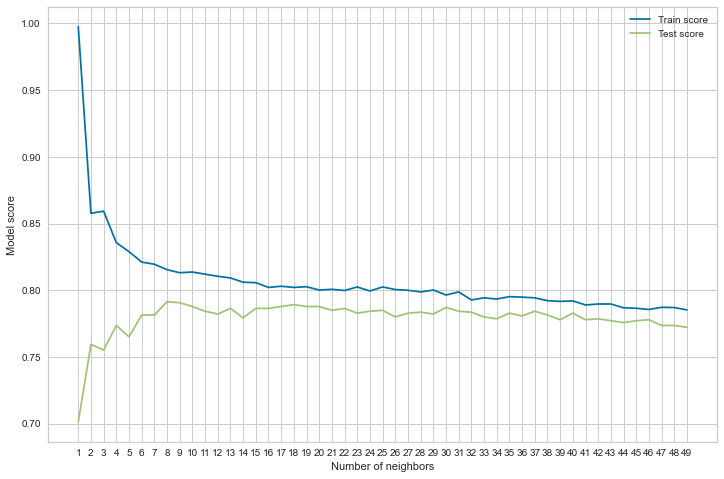

In [102]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 50, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print("Maximum KNN score on the train data: {:.2f}%".format(max(train_score)*100))
print("Maximum KNN score on the test data: {:.2f}%".format(max(test_score)*100))

In [103]:
parameters = {"n_neighbors": range(10,20),
              "weights": ['distance', 'uniform'], 
              "algorithm":['auto', 'ball_tree']
             }

grid_cv = GridSearchCV(estimator=knn, param_grid = parameters, cv = 5)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_

df_results = pd.DataFrame(results)
df_results = df_results[['param_n_neighbors','param_weights', 'param_algorithm','mean_test_score']]
df_results = df_results.sort_values(by='mean_test_score', ascending = False)
df_results.head(10)

,param_n_neighbors,param_weights,param_algorithm,mean_test_score
5,12,uniform,auto,0.786476
25,12,uniform,ball_tree,0.786298
15,17,uniform,auto,0.786120
35,17,uniform,ball_tree,0.785943
14,17,distance,auto,0.785943
34,17,distance,ball_tree,0.785765
7,13,uniform,auto,0.785412
27,13,uniform,ball_tree,0.785057
23,11,uniform,ball_tree,0.784879
3,11,uniform,auto,0.784169


In [104]:
best_params = grid_cv.best_params_
print('Best parameters: ',best_params)

knn_clf = KNeighborsClassifier(**best_params)
knn_clf.fit(X_train, y_train)

test_prediction_proba = knn_clf.predict_proba(X_test)[:,1]
knn_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = knn_clf.predict(X_test)
knn_precision = precision_score(y_test,y_pred)
knn_recall = recall_score(y_test,y_pred)

knn_train_acc, knn_test_acc = print_score(knn_clf)

Best parameters:  {'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'uniform'}
Train Accuracy: 81.04%
Test Accuracy: 78.21%


In [105]:
results_df_2 = pd.DataFrame(data=[["Tuned K-Nearest Neighbors", knn_train_acc, knn_test_acc, knn_auc, knn_precision, knn_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.805112,0.800568,0.849965,0.670330,0.489305
1,Tuned K-Nearest Neighbors,0.810437,0.782115,0.780643,0.658768,0.371658


### 3. Decision Tree

In [106]:
parameters = {"criterion": ['gini', 'entropy'],
              "splitter": ['best', 'random'],
              "max_depth": [3, 4, 5, 6],
              "min_samples_split":[4, 5, 6],
              "max_features":['auto', 'sqrt', 'log2']
             }

grid_cv = GridSearchCV(estimator=decision_tree, param_grid = parameters, cv=3)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_

df_results = pd.DataFrame(results)
df_results = df_results[['param_criterion','param_splitter', 'param_max_depth', 'param_min_samples_split','param_max_features','mean_test_score']]
df_results = df_results.sort_values(by='mean_test_score', ascending = False)
df_results.head(10)

,param_criterion,param_splitter,param_max_depth,param_min_samples_split,param_max_features,mean_test_score
18,gini,best,4,4,auto,0.790380
30,gini,best,4,4,log2,0.790380
26,gini,best,4,5,sqrt,0.790380
32,gini,best,4,5,log2,0.790380
24,gini,best,4,4,sqrt,0.790380
22,gini,best,4,6,auto,0.790380
20,gini,best,4,5,auto,0.790380
34,gini,best,4,6,log2,0.790380
28,gini,best,4,6,sqrt,0.790380
92,entropy,best,4,5,auto,0.790025


In [107]:
best_params = grid_cv.best_params_
print('Best_params: ',best_params)

dt_clf = DecisionTreeClassifier(**best_params, random_state=123)
dt_clf.fit(X_train, y_train)

test_prediction_proba = dt_clf.predict_proba(X_test)[:,1]
dt_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = dt_clf.predict(X_test)
dt_precision = precision_score(y_test,y_pred)
dt_recall = recall_score(y_test,y_pred)

dt_train_acc, dt_test_acc = print_score(dt_clf)

Best_params:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 4, 'splitter': 'best'}
Train Accuracy: 74.92%
Test Accuracy: 75.16%


In [108]:
results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree", dt_train_acc, dt_test_acc, dt_auc, dt_precision, dt_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.805112,0.800568,0.849965,0.670330,0.489305
1,Tuned K-Nearest Neighbors,0.810437,0.782115,0.780643,0.658768,0.371658
2,Tuned Decision Tree,0.749201,0.751597,0.786524,0.593750,0.203209


### 4. Random Forest

In [109]:
parameters = {"n_estimators": [100, 110],
              "criterion": ['gini', 'entropy'],
              "max_depth":[5, 7, 8],
              "min_samples_split":[5, 6],
              "max_features":['auto', 'sqrt', 'log2']
             }

grid_cv = GridSearchCV(estimator=random_forest, param_grid = parameters, cv = 5)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_

df_results = pd.DataFrame(results)
df_results = df_results[['param_n_estimators', 'param_criterion', 'param_max_depth', 'param_min_samples_split','param_max_features','mean_test_score']]
df_results = df_results.sort_values(by='mean_test_score', ascending = False)
df_results.head(10)

,param_n_estimators,param_criterion,param_max_depth,param_min_samples_split,param_max_features,mean_test_score
24,100,gini,8,5,auto,0.801563
28,100,gini,8,5,sqrt,0.801563
32,100,gini,8,5,log2,0.801563
33,110,gini,8,5,log2,0.801387
29,110,gini,8,5,sqrt,0.801387
25,110,gini,8,5,auto,0.801387
34,100,gini,8,6,log2,0.799612
30,100,gini,8,6,sqrt,0.799612
26,100,gini,8,6,auto,0.799612
35,110,gini,8,6,log2,0.799611


In [110]:
best_params = grid_cv.best_params_
print('Best parameters: ', best_params)

rf_clf = RandomForestClassifier(**best_params, random_state=11)
rf_clf.fit(X_train, y_train)

test_prediction_proba = rf_clf.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = rf_clf.predict(X_test)
rf_precision = precision_score(y_test,y_pred)
rf_recall = recall_score(y_test,y_pred)

rf_train_acc, rf_test_acc = print_score(rf_clf)

Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}
Train Accuracy: 83.00%
Test Accuracy: 80.27%


In [111]:
results_df_2 = pd.DataFrame(data=[["Tuned Random Forest", rf_train_acc, rf_test_acc, rf_auc, rf_precision, rf_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.805112,0.800568,0.849965,0.670330,0.489305
1,Tuned K-Nearest Neighbors,0.810437,0.782115,0.780643,0.658768,0.371658
2,Tuned Decision Tree,0.749201,0.751597,0.786524,0.593750,0.203209
3,Tuned Random Forest,0.829961,0.802697,0.846523,0.683206,0.478610


### 5. Support Vector Machines

In [112]:
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#               "kernel": ['poly', 'rbf'], 
              'probability':[True],
#               "gamma":[0.1, 1]
             }

grid_cv = GridSearchCV(estimator=svc, param_grid = parameters, cv = 5)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_

df_results = pd.DataFrame(results)
df_results = df_results[['param_C', 'mean_test_score']]
df_results = df_results.sort_values(by='mean_test_score', ascending = False)
df_results.head(10)

,param_C,mean_test_score
6,1000,0.786654
5,100,0.783814
4,10,0.764288
0,0.001,0.734647
1,0.01,0.734647
2,0.1,0.734647
3,1,0.734647


In [113]:
best_params = grid_cv.best_params_
print('Best parameters: ', best_params)

svc_clf = SVC(**best_params, random_state=11)
svc_clf.fit(X_train, y_train)

test_prediction_proba = svc_clf.predict_proba(X_test)[:,1]
svc_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = svc_clf.predict(X_test)
svc_precision = precision_score(y_test,y_pred)
svc_recall = recall_score(y_test,y_pred)

svc_train_acc, svc_test_acc = print_score(svc_clf)

Best parameters:  {'C': 1000, 'probability': True}
Train Accuracy: 78.95%
Test Accuracy: 78.00%


In [114]:
results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", svc_train_acc, svc_test_acc, svc_auc, svc_precision, svc_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.805112,0.800568,0.849965,0.670330,0.489305
1,Tuned K-Nearest Neighbors,0.810437,0.782115,0.780643,0.658768,0.371658
2,Tuned Decision Tree,0.749201,0.751597,0.786524,0.593750,0.203209
3,Tuned Random Forest,0.829961,0.802697,0.846523,0.683206,0.478610
4,Tuned Support Vector Machine,0.789492,0.779986,0.792694,0.648148,0.374332


### 6. XGBoost

In [115]:
train_score = []
test_score = []
estimators = range(1, 27)

for n in estimators:
    model = XGBClassifier(n_estimators=n, verbosity=0)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum XGBoost score on the train data: 85.82%
Maximum XGBoost score on the test data: 80.55%


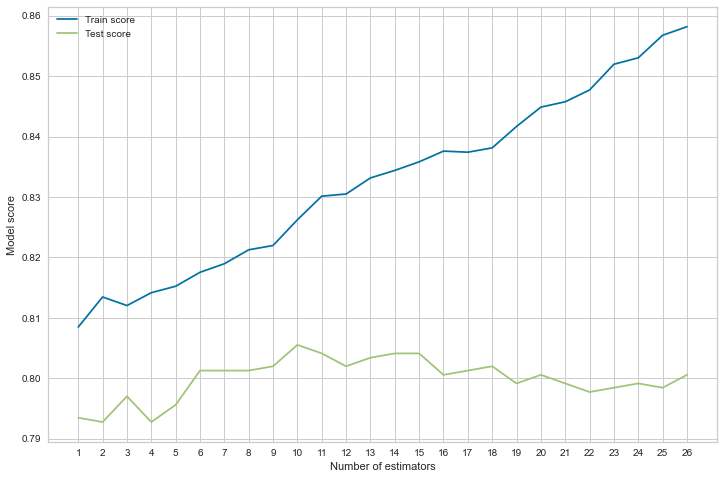

In [116]:
plt.figure(figsize=(12, 8))

plt.plot(estimators, train_score, label="Train score")
plt.plot(estimators, test_score, label="Test score")
plt.xticks(np.arange(1, 27, 1))
plt.xlabel("Number of estimators")
plt.ylabel("Model score")
plt.legend()

print("Maximum XGBoost score on the train data: {:.2f}%".format(max(train_score)*100))
print("Maximum XGBoost score on the test data: {:.2f}%".format(max(test_score)*100))

In [117]:
parameters = {"n_estimators": [10, 15, 20, 25],
              "max_depth": [4, 5, 6, 7],
              "gamma":[0.01, 0.1, 1],
              "learning_rate":[0.1, 0.2, 0.3, 0.4]
             }

grid_cv = GridSearchCV(estimator=xgboost, param_grid = parameters, cv = 5)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_

df_results = pd.DataFrame(results)
df_results = df_results[['param_n_estimators', 'param_max_depth', 'param_gamma', 'param_learning_rate','mean_test_score']]
df_results = df_results.sort_values(by='mean_test_score', ascending = False)
df_results.head(10)

,param_n_estimators,param_max_depth,param_gamma,param_learning_rate,mean_test_score
83,25,4,0.1,0.2,0.801387
19,25,4,0.01,0.2,0.800854
176,10,4,1,0.4,0.800853
150,20,5,1,0.2,0.800675
135,25,5,1,0.1,0.800499
33,15,4,0.01,0.3,0.800322
146,20,4,1,0.2,0.800322
112,10,4,0.1,0.4,0.800144
48,10,4,0.01,0.4,0.800144
149,15,5,1,0.2,0.799967


In [118]:
best_params = grid_cv.best_params_
print('Best parameters: ', best_params)

xgb_clf = XGBClassifier(**best_params, verbosity=0 ,random_state=11)
xgb_clf.fit(X_train, y_train)

test_prediction_proba = xgb_clf.predict_proba(X_test)[:,1]
xgb_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = xgb_clf.predict(X_test)
xgb_precision = precision_score(y_test,y_pred)
xgb_recall = recall_score(y_test,y_pred)

xgb_train_acc, xgb_test_acc = print_score(xgb_clf)

Best parameters:  {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 25}
Train Accuracy: 81.79%
Test Accuracy: 80.91%


In [119]:
results_df_2 = pd.DataFrame(data=[["Tuned XGBoost", xgb_train_acc, xgb_test_acc, xgb_auc, xgb_precision, xgb_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.805112,0.800568,0.849965,0.670330,0.489305
1,Tuned K-Nearest Neighbors,0.810437,0.782115,0.780643,0.658768,0.371658
2,Tuned Decision Tree,0.749201,0.751597,0.786524,0.593750,0.203209
3,Tuned Random Forest,0.829961,0.802697,0.846523,0.683206,0.478610
4,Tuned Support Vector Machine,0.789492,0.779986,0.792694,0.648148,0.374332
5,Tuned XGBoost,0.817891,0.809084,0.851292,0.682927,0.524064


### 7. Light GBM

In [120]:
train_score = []
test_score = []
estimators = range(1, 50)

for n in estimators:
    model = lgb.LGBMClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum LightGBM score on the train data: 84.84%
Maximum LightGBM score on the test data: 80.41%


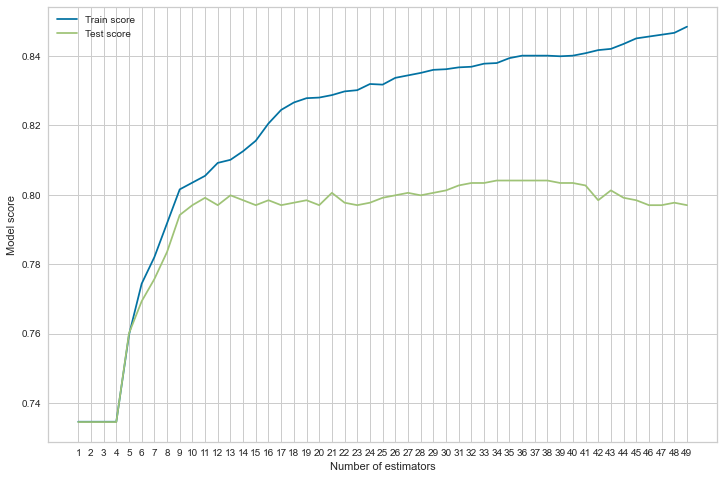

In [121]:
plt.figure(figsize=(12, 8))

plt.plot(estimators, train_score, label="Train score")
plt.plot(estimators, test_score, label="Test score")
plt.xticks(np.arange(1, 50, 1))
plt.xlabel("Number of estimators")
plt.ylabel("Model score")
plt.legend()

print("Maximum LightGBM score on the train data: {:.2f}%".format(max(train_score)*100))
print("Maximum LightGBM score on the test data: {:.2f}%".format(max(test_score)*100))

In [122]:
parameters = {"n_estimators": [21, 27, 32, 36],
              "max_depth": [5, 6, 7],
              "min_child_samples":[20, 21, 22]
             }

grid_cv = GridSearchCV(estimator=light_gbm, param_grid = parameters, cv = 5)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_

df_results = pd.DataFrame(results)
df_results = df_results[['param_n_estimators', 'param_max_depth', 'param_min_child_samples','mean_test_score']]
df_results = df_results.sort_values(by='mean_test_score', ascending = False)
df_results.head(10)

,param_n_estimators,param_max_depth,param_min_child_samples,mean_test_score
17,27,6,21,0.800320
18,32,6,21,0.799965
22,32,6,22,0.799611
21,27,6,22,0.799433
20,21,6,22,0.798902
7,36,5,21,0.798723
19,36,6,21,0.798723
16,21,6,21,0.798546
15,36,6,20,0.798191
2,32,5,20,0.798014


In [123]:
best_params = grid_cv.best_params_
print('Best parameters: ', best_params)

lgbm_clf = lgb.LGBMClassifier(**best_params, random_state=11)
lgbm_clf.fit(X_train, y_train)

test_prediction_proba = lgbm_clf.predict_proba(X_test)[:,1]
lgbm_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred = lgbm_clf.predict(X_test)
lgbm_precision = precision_score(y_test,y_pred)
lgbm_recall = recall_score(y_test,y_pred)

lgbm_train_acc, lgbm_test_acc = print_score(lgbm_clf)

Best parameters:  {'max_depth': 6, 'min_child_samples': 21, 'n_estimators': 27}
Train Accuracy: 82.57%
Test Accuracy: 81.19%


In [124]:
results_df_2 = pd.DataFrame(data=[["Tuned Light GBM", lgbm_train_acc, lgbm_test_acc, lgbm_auc, lgbm_precision, lgbm_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)

# Results and Conclusion

In [125]:
model_summary

,Models,Train Accuracy,Test Accuracy,AUC Score,Precision,Recall
0,Logistic Regression,0.805289,0.804116,0.853086,0.663333,0.532086
1,K-Nearest Neighbors,0.828896,0.765082,0.754945,0.575439,0.438503
2,Decision Tree,0.997693,0.721789,0.651666,0.477041,0.500000
3,Random Forest,0.996805,0.787793,0.825470,0.635379,0.470588
4,Support Vector Machine,0.734647,0.734564,0.786303,0.000000,0.000000
5,XGBoost,0.896166,0.800568,0.834779,0.649518,0.540107
6,Light GBM,0.876642,0.797019,0.847564,0.638365,0.542781


In [126]:
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Tuned Logistic Regression,0.805112,0.800568,0.849965,0.670330,0.489305
1,Tuned K-Nearest Neighbors,0.810437,0.782115,0.780643,0.658768,0.371658
2,Tuned Decision Tree,0.749201,0.751597,0.786524,0.593750,0.203209
3,Tuned Random Forest,0.829961,0.802697,0.846523,0.683206,0.478610
4,Tuned Support Vector Machine,0.789492,0.779986,0.792694,0.648148,0.374332
5,Tuned XGBoost,0.817891,0.809084,0.851292,0.682927,0.524064
6,Tuned Light GBM,0.825701,0.811923,0.849678,0.682274,0.545455


<b>1.</b> In this project, after preparing the dataset I implemented classification algorithms such as Logistic Regression, K-nearest Neighbor, Decision Tree, Random Forest, Support Vector Machine, XGBoost and Light GBM on telco customer curn dataset.

<b>2.</b> Looking at the model results I concluded that some of the models overfitted the train sets. 

<b>3.</b> To improve the models I did hyperparameter tuning. After tuning, the overfitting problem have been solved.

<b>4.</b> Aside from fixing the overfitting problem it seems like the results doesn't improved a lot after hyperparameter tuning. Maybe because the dataset is small.

<b>5.</b> The most successfull model is Light GBM and the least successfull model is decision tree but overall we can say that all of our models are successfull.